In [30]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [31]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")

In [32]:
ohe = OneHotEncoder

In [33]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 4 else 'medium'
if value <= 6 else 'high')

# 3 4 5 are low, 6 7 medium, 8 and nonexistent 9 are high
#changed to: 3 4 low, 5 6 medium, 7 8 (and 9) high

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,medium
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high


In [34]:
#Skewness measures asymmetry in the data distribution

#print(white_wine['residual sugar'].astype(float).skew())

In [35]:
#Kurtosis identifies outliers: data with high kurtosis (heavy-tailed data) is proof of outliers, and data with low kurtosis (light-tailed data) lacks them.

#print(white_wine['residual sugar'].astype(float).kurt())

In [36]:
# x is all the features Im keeping
# y is target, quality , the new name.

#X.drop(['SalePrice'],axis=1,inplace=True) REMEMBER THE INPLACE!!

In [37]:
#white_wine["quality_label"].unique()
#white_wine ["quality_label"].value_counts()

In [38]:
le = LabelEncoder()

In [39]:
new_wine = pd.DataFrame(white_wine, columns=['quality_label'])

new_wine['quality_label'] = new_wine['quality_label'].astype('category')

new_wine['quality_label_Cat'] = new_wine['quality_label'].cat.codes

new_wine

,quality_label,quality_label_Cat
0,medium,1
1,medium,1
2,medium,1
3,medium,1
4,medium,1
...,...,...
4893,medium,1
4894,medium,1
4895,medium,1
4896,high,2


In [40]:
x_data = white_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y_data = new_wine["quality_label_Cat"]


In [41]:

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
new_frame = [white_wine, new_wine]
new_frame


[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0              0.27         0.36            20.7      0.045   
 1               6.3              0.30         0.34             1.6      0.049   
 2               8.1              0.28         0.40             6.9      0.050   
 3               7.2              0.23         0.32             8.5      0.058   
 4               7.2              0.23         0.32             8.5      0.058   
 ...             ...               ...          ...             ...        ...   
 4893            6.2              0.21         0.29             1.6      0.039   
 4894            6.6              0.32         0.36             8.0      0.047   
 4895            6.5              0.24         0.19             1.2      0.041   
 4896            5.5              0.29         0.30             1.1      0.022   
 4897            6.0              0.21         0.38             0.8      0.020   
 
       free su

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.3, shuffle=False)
x_train, x_test, y_train, y_test

#this is fine!

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0              0.27         0.36           20.70      0.045   
 1               6.3              0.30         0.34            1.60      0.049   
 2               8.1              0.28         0.40            6.90      0.050   
 3               7.2              0.23         0.32            8.50      0.058   
 4               7.2              0.23         0.32            8.50      0.058   
 ...             ...               ...          ...             ...        ...   
 3423            7.1              0.18         0.39           14.50      0.051   
 3424            6.4              0.32         0.27            4.90      0.034   
 3425            7.1              0.17         0.40           14.55      0.047   
 3426            7.1              0.17         0.40           14.55      0.047   
 3427            5.8              0.24         0.26           10.05      0.039   
 
       free su

In [44]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

In [45]:
len(x_test)

1470

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [47]:
from sklearn.metrics import cohen_kappa_score

In [48]:
#Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=400)
model.fit(x_train, y_train)

#ensemble used when using multiple algorithms to predict the outcome.
#we are building multiple decision trees.
#increase the estimators, get a higher score, in theory


RandomForestClassifier(n_estimators=400)

In [50]:
model.score (x_test, y_test)

0.7496598639455783

In [51]:
y_predicted = model.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,  37,   2],
       [  2, 958, 167],
       [  0, 160, 144]])

In [62]:
print("Confusion matrix:")
print(confusion_matrix(y_test, cm))

Confusion matrix:


ValueError: Found input variables with inconsistent numbers of samples: [1470, 3]

Text(24.0, 0.5, 'Truth')

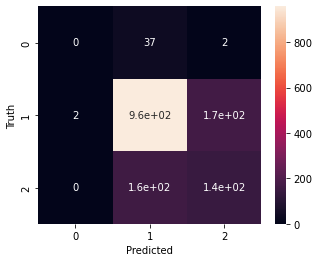

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [54]:
x_data = white_wine[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y_data = new_wine["quality_label_Cat"]

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.3, shuffle=False)
x_train, x_test, y_train, y_test

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0              0.27         0.36           20.70      0.045   
 1               6.3              0.30         0.34            1.60      0.049   
 2               8.1              0.28         0.40            6.90      0.050   
 3               7.2              0.23         0.32            8.50      0.058   
 4               7.2              0.23         0.32            8.50      0.058   
 ...             ...               ...          ...             ...        ...   
 3423            7.1              0.18         0.39           14.50      0.051   
 3424            6.4              0.32         0.27            4.90      0.034   
 3425            7.1              0.17         0.40           14.55      0.047   
 3426            7.1              0.17         0.40           14.55      0.047   
 3427            5.8              0.24         0.26           10.05      0.039   
 
       free su

In [56]:
pred_rf = rf.predict(x_test)

In [58]:
print("Confusion matrix:")
print(confusion_matrix(y_test, pred_rf))

Confusion matrix:
[[  1  36   2]
 [  2 953 172]
 [  0 166 138]]


In [61]:
#Visualisation of the CM

In [59]:
print("Accuracy score:", accuracy_score(y_test, pred_rf))

Accuracy score: 0.7428571428571429


In [60]:
kappa = cohen_kappa_score(pred_rf, y_test)
print("Cohen-Kappa score:", kappa)

Cohen-Kappa score: 0.27293424926398435


In [ ]:
#Here is one possible interpretation of Kappa:
#Poor agreement = Less than 0.20 (including negative numbers)
#Fair agreement = 0.20 to 0.40
#Moderate agreement = 0.40 to 0.60
#Good agreement = 0.60 to 0.80
#Very good agreement = 0.80 to 1.00